
# Scientific Computation Lab 9 solution







In this lab, you will learn about time-delay reconstructions of nonlinear dynamics from a single time series. We will use simulations of the Lorenz equations to generate the data, choose an appropriate time delay and vector dimension, and then visually compare the reconstruction and full solution.
Code for solving the Lorenz equations is below.

$\frac{dx}{dt}=\sigma(y-x)$

$\frac{dy}{dt}=rx-y-xz $

$\frac{dz}{dt}=xy-bz$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist

def RHS(t,f,r,s,b):
    """RHS of Lorenz equations
    """
    df = np.zeros_like(f)
    df[0] = s*(f[1]-f[0])
    df[1] = r*f[0]-f[1]-f[0]*f[2]
    df[2] = f[0]*f[1] - b*f[2]
    return df

#set parameters
r,s,b = 28,10,8/3
T = 240 #timespan
Nt = 12800 
t = np.linspace(0,T,Nt+1)
f0 = [1,1,1] #arbitrary initial condition
dt = t[1] #timestep

#call solve_ivp and rearrange output
f = solve_ivp(RHS,[0,T],f0,t_eval=t,args=(r,s,b),method='BDF',atol=1e-8,rtol=1e-8).y.T
x,y,z = f[:,0],f[:,1],f[:,2]

The cell below will create a 3d plot generated by the code above:

Text(0.5, 0.92, '$Lorenz, r,\\sigma,b=28.00,10.00,2.67$')

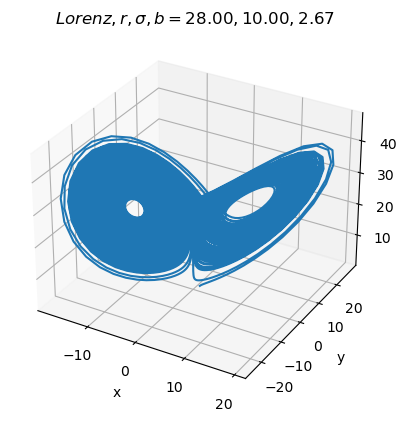

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('$Lorenz, r,\sigma,b=%3.2f,%3.2f,%3.2f$' %(r,s,b))

1) Plot x(t) and based on the figure, set nskip as the number of points to discard from the start of the solution

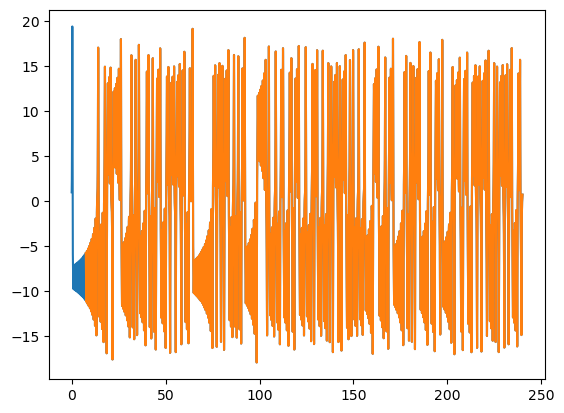

In [3]:
#nskip=?
#t,x,y,z = t[nskip:],x[nskip:],y[nskip],z[nskip] #discard initial transient
plt.figure()
plt.plot(t,x)
nskip=400
t,x,y,z = t[nskip:],x[nskip:],y[nskip:],z[nskip:]
plt.plot(t,x)
Nt = t.size
T = t[-1]-t[0]

2) Use Welch's method to compute the power spectrum of *x* and then use the results to estimate a "dominant" frequency, f. Check that the timestep in the data is small compared to 1/f. 

f= 0.20833333333333334
dt,1/f= 0.018749999999999822 4.8


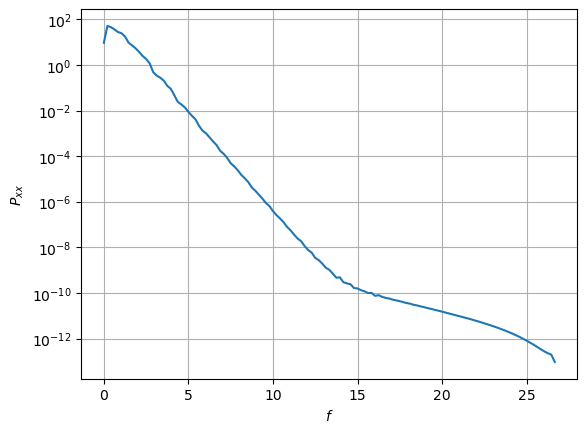

In [5]:
#IMPORTANT: A larger T is needed for the simulation above 
#to get an accurate estimate of f
from scipy.signal import welch

fxx,Pxx = welch(x,fs=1/dt)
plt.figure()
plt.semilogy(fxx,Pxx)
plt.xlabel(r'$f$')
plt.ylabel(r'$P_{xx}$')
plt.grid()
f = fxx[Pxx==Pxx.max()][0]
print("f=",f)
print("dt,1/f=",t[1]-t[0],1/f)

2) Set the time delay to be $\tau=1/(5f)$
and construct ($Nt-2\Delta$) 3-dimensional vectors. The *ith* vector should correspond to $[x(t_i),x(t_i+\tau),x(t_i+2\tau)]$, $i \in \{0,1,...,Nt-1-2\Delta\}$ where $\Delta = int(\tau/dt)$
These vectors can be collected into a N x 3 matrix (using, say, np.vstack and taking the transpose) with $N = Nt-2\Delta$, but you don't need to do that here.

In [7]:
tau = 1/(5*f)
Del = int(tau/dt)
print(Del,x.size)
v1 = np.vstack([x[:-2*Del],x[Del:-Del],x[2*Del:]])
v1.shape
v10 = v1.copy()

51 12401


3) Plot the 2nd coordinate against the 1st, compare this to a plot of x vs y

Text(0, 0.5, 'y')

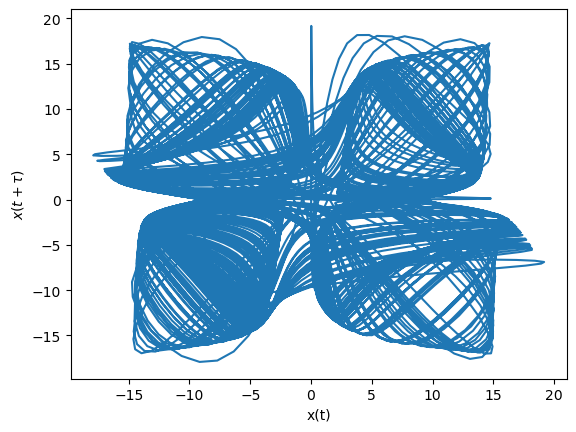

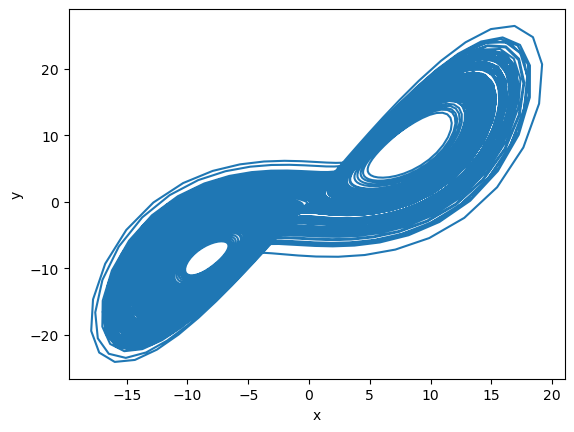

In [8]:
plt.figure()
plt.plot(v1[0],v1[1])
plt.xlabel('x(t)')
plt.ylabel(r'$x(t+\tau)$')
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

4) Repeat the steps above with $\tau$ reduced by a factor of 4. Do the plots look more (or less) similar?

12 12401


Text(0, 0.5, 'y')

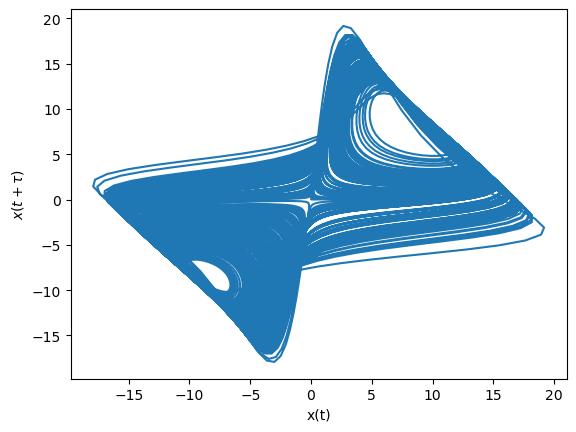

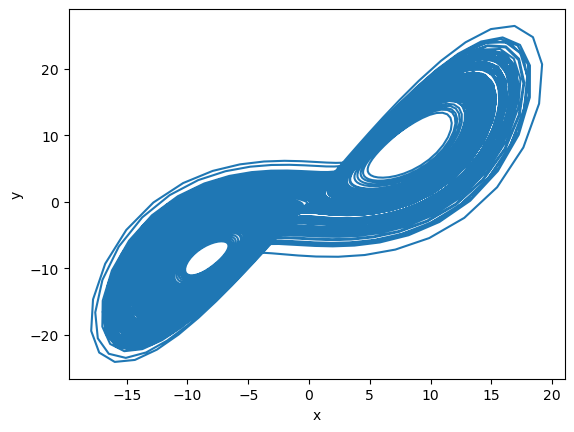

In [9]:
tau = tau/4
Del = int(tau/dt)
print(Del,x.size)
v1 = np.vstack([x[:-2*Del],x[Del:-Del],x[2*Del:]])
v1.shape
plt.figure()
plt.plot(v1[0],v1[1])
plt.xlabel('x(t)')
plt.ylabel(r'$x(t+\tau)$')
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

3) Now, construct a 3d plot of the time-delay vectors

Text(0.5, 0.92, '$Lorenz, r,\\sigma,b=28.00,10.00,2.67$')

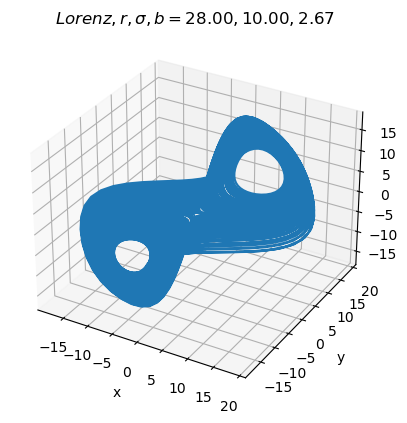

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(v1[0],v1[1],v1[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('$Lorenz, r,\sigma,b=%3.2f,%3.2f,%3.2f$' %(r,s,b))

Note that the time-delay vectors with the smaller $\tau$ should produce a visually "better" approximation to the solution, however the larger value of $\tau$ is better for computing the correlation sum. Larger time delays help ensure that the coordinates in the 3-dimensional vector are not strongly correlated. This is also important for large systems or datasets with many variables where time delays can be used to reduce the correlation between pairs of highly-correlated variables. 

You can use np.corrcoef to compare the correlation between $x$ and $y$ with the correlation between $x(t)$ and $x(t+\tau)$ for the two values of $\tau$ that you have used.  

In [10]:
np.corrcoef(x,y)[0,1]

0.8781449492093987

In [11]:
print(np.corrcoef(v10[0],v10[1])[0,1]) #1st time delay (lower correlation is better here)
print(np.corrcoef(v1[0],v1[1])[0,1]) #2nd time delay

0.12762094616437702
0.5318645261773252
